/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/f

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.9258 - loss: 0.2630
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step - accuracy: 0.9655 - loss: 0.1168
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 895us/step - accuracy: 0.9769 - loss: 0.0785
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 900us/step - accuracy: 0.9815 - loss: 0.0591
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.9854 - loss: 0.0463
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.9732 - loss: 0.0843
Test accuracy: 97.32%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step


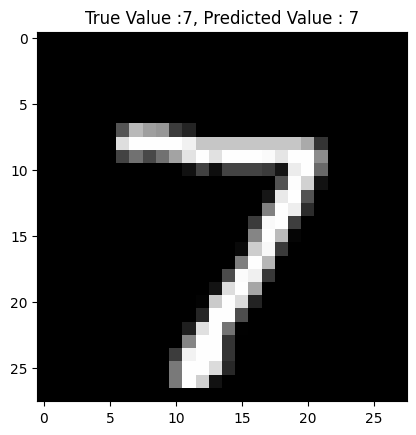

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 1. Create a TensorBoard callback
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs/adam")
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 2. Train model with TensorBoard callback
model.fit(x_train, y_train, epochs=5, callbacks=[tb_callback])

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy *100:.2f}%')

predictions = model.predict(x_test)
plt.imshow(x_test[0], cmap='gray')
plt.title(f"True Value :{y_test[0]}, Predicted Value : {np.argmax(predictions[0])}")
plt.show()

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step - accuracy: 0.8366 - loss: 0.6450
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step - accuracy: 0.9041 - loss: 0.3436
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.9171 - loss: 0.2974
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - accuracy: 0.9250 - loss: 0.2674
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.9317 - loss: 0.2443
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.9350 - loss: 0.2294
Test accuracy : 93.50%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step


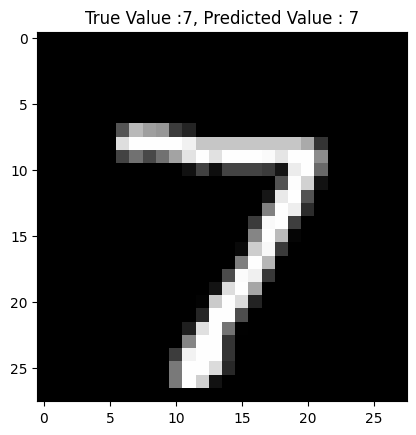

In [14]:
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 1. Create a TensorBoard callback
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs/sgd')

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 2. Train model with TensorBoard callback
model.fit(x_train, y_train, epochs=5, callbacks=[tb_callback])

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy : { test_accuracy *100:.2f}%')

predictions = model.predict(x_test)

plt.imshow(x_test[0], cmap='gray')
plt.title(f"True Value :{y_test[0]}, Predicted Value : {np.argmax(predictions[0])}")
plt.show()

In [15]:
# 3. Launch TensorBoard
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [16]:
import os
os.environ["PATH"] += ":/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/bin"
%load_ext tensorboard
%tensorboard --logdir logs --load_fast=false

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 14363), started 0:06:16 ago. (Use '!kill 14363' to kill it.)

In [17]:
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 793us/step - accuracy: 0.9261 - loss: 0.2588
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.9659 - loss: 0.1138
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.9770 - loss: 0.0778
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.9821 - loss: 0.0583
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.9856 - loss: 0.0468


In [18]:
model.layers

[<Flatten name=flatten_2, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [19]:
weights, biases = model.layers[1].get_weights()
print("Weights shape:", weights.shape) # Shape of weight matrix
print("Biases Shape:", biases.shape) # shape of bias vector
print("Weights")
print(weights)
print("biases")
print(biases)

Weights shape: (784, 128)
Biases Shape: (128,)
Weights
[[ 0.07687613  0.02344864  0.0042799  ... -0.0419865  -0.02861558
   0.03898412]
 [ 0.03277051 -0.07288156  0.0453613  ... -0.05418344 -0.07267559
  -0.02365449]
 [ 0.03130171  0.05927771 -0.0202268  ...  0.07409791  0.05930223
  -0.00895251]
 ...
 [ 0.00779308 -0.04505512  0.07004727 ...  0.01767588 -0.02109336
   0.08059395]
 [-0.05108191  0.01468726 -0.06603014 ...  0.06441558 -0.07525619
  -0.07816879]
 [-0.03515028  0.02232773 -0.04847085 ... -0.01282386  0.08090963
   0.0176179 ]]
biases
[ 0.01573571 -0.09582254  0.00724219  0.07906132  0.00976223 -0.04766149
  0.01274482 -0.07533571  0.05916012  0.12561029  0.08357288  0.06254715
  0.17569132 -0.06696258  0.00541014 -0.0237954   0.08032732 -0.01754308
  0.01102694 -0.00660142  0.07353341  0.06799099  0.1704194  -0.05974257
  0.06720892 -0.00871725  0.02523074 -0.08274913  0.05291548 -0.06285978
  0.18654223  0.09358361  0.08040389 -0.07061616  0.03912163  0.05078373
 -0.0655

In [20]:
weights, biases = model.layers[2].get_weights()
print("Weights shape:", weights.shape) # Shape of weight matrix
print("Biases Shape:", biases.shape) # shape of bias vector
print("Weights")
print(weights)
print("biases")
print(biases)

Weights shape: (128, 10)
Biases Shape: (10,)
Weights
[[-0.4469439  -0.2263058  -0.6644542  ... -0.43049034 -0.04413316
   0.15251957]
 [ 0.19069587 -0.0730256  -0.2998389  ...  0.10659055 -0.43450186
   0.24560587]
 [ 0.08808016 -0.6734254  -0.4302419  ... -0.17017289  0.01881917
   0.39538708]
 ...
 [-0.10762024 -0.43277144  0.05395372 ... -0.40005982 -0.03337801
   0.23941387]
 [ 0.1096938   0.05569305 -0.0319706  ...  0.20977382 -0.5663317
   0.34142944]
 [-0.02825805 -0.18670267  0.41095003 ... -0.17917693 -0.3469297
  -0.18984027]]
biases
[-0.10120655 -0.07161989 -0.01344537 -0.12773855  0.08945081  0.04260021
 -0.04044973  0.01610158  0.16894473 -0.03790488]


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

data = fetch_california_housing()
x,y = data.data, data.target

print(f"Target Value Range (in 100,000s): Min = {y.min():.2f}, Max = {y.max():.2f}, Mean = {y.mean():.2f}")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE: ${test_mae * 100000:.2f}')

sample_input = np.expand_dims(x_test[0], axis=0)
predicted_price = model.predict(sample_input)

print(f'Predicted House Price: ${predicted_price[0][0] * 100000:.2f}')
                                    


/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/f

Target Value Range (in 100,000s): Min = 0.15, Max = 5.00, Mean = 2.07
Epoch 1/20


/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 383us/step - loss: 0.8061 - mae: 0.6171
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 0.4039 - mae: 0.4491
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 0.3701 - mae: 0.4306
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 0.3541 - mae: 0.4202
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 0.3316 - mae: 0.4053
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.3269 - mae: 0.3993
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 0.3195 - mae: 0.3924
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 0.3097 - mae: 0.3888
Epoch 9/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 0.3091 - mae: 0.3853
Epoch 10/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 0.3067 - mae: 0.3807
Epoch 11/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 0.3048 - mae: 0.3783
Epoch 12/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 0.2954 - mae: 0.3766
Epoch 13/20


ExactExplainer explainer: 4129it [00:34, 84.60it/s]                                                                                                                                                         


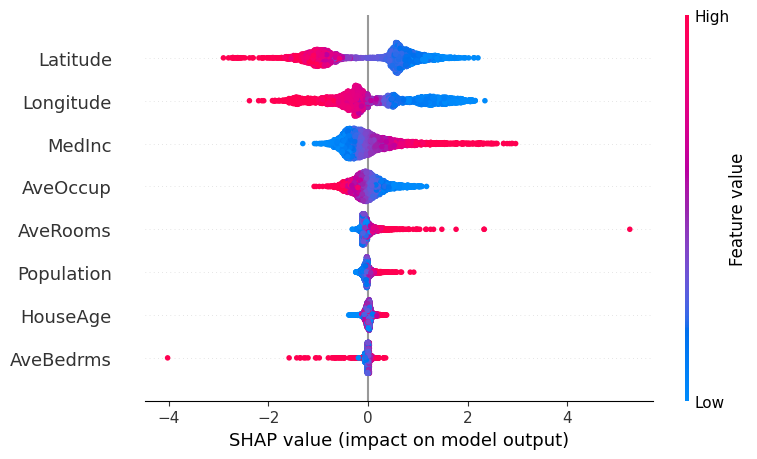

In [7]:
#Shapley Additive explanations

import shap

# create shap explainer
explainer = shap.Explainer(model, x_train)

# Compute Shap values
shap_values = explainer(x_test)

# Summary plot - Shows feature importance
shap.summary_plot(shap_values, x_test, feature_names=data.feature_names)

In [8]:
# Negative Values - feature lowers the predicted value
# Positive Values - feature increases the predicted value

In [9]:
# Load and Preprocess the MNIST Dataset
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to range [0,1]
X_train, X_test = X_train / 255.0 , X_test / 255.0

# Reshape to match CNN input (batch_size, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Training Shape:", X_train.shape)  #(60000, 28, 28, 1)
print("Test Shape:", X_test.shape) # (10000, 28, 28, 1)



Training Shape: (60000, 28, 28, 1)
Test Shape: (10000, 28, 28, 1)


In [19]:
def create_cnn_with_strides():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', strides=2, input_shape=(28,28,1)),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', strides=2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model
    
cnn_model = create_cnn_with_strides()
cnn_history = cnn_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=64)

/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9451 - loss: 0.1895 - val_accuracy: 0.9762 - val_loss: 0.0760
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9829 - loss: 0.0561 - val_accuracy: 0.9833 - val_loss: 0.0487
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9887 - loss: 0.0359 - val_accuracy: 0.9858 - val_loss: 0.0393
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9921 - loss: 0.0254 - val_accuracy: 0.9889 - val_loss: 0.0327
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9944 - loss: 0.0175 - val_accuracy: 0.9867 - val_loss: 0.0428
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9949 - loss: 0.0147 - val_accuracy: 0.9884 - val_loss: 0.0383
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9963 - loss: 0.0109 - val_accuracy: 0.9873 - val_loss: 0.0417
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9969 - loss: 0.0088 - val_accuracy: 0.

In [20]:
def create_batchnorm_cnn():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', strides=2, input_shape=(28,28,1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', strides=2),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model
    
batchnorm_cnn = create_batchnorm_cnn()
batchnorm_history = batchnorm_cnn.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9617 - loss: 0.1270 - val_accuracy: 0.9832 - val_loss: 0.0520
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9859 - loss: 0.0467 - val_accuracy: 0.9856 - val_loss: 0.0451
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9902 - loss: 0.0314 - val_accuracy: 0.9881 - val_loss: 0.0405
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9928 - loss: 0.0233 - val_accuracy: 0.9842 - val_loss: 0.0502
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9949 - loss: 0.0166 - val_accuracy: 0.9897 - val_loss: 0.0358
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9956 - loss: 0.0137 - val_accuracy: 0.9881 - val_loss: 0.0389
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9959 - loss: 0.0126 - val_accuracy: 0.9871 - val_loss: 0.0419
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9972 - loss: 0.0091 - val_accuracy: 0

In [21]:
def create_dropout_cnn():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', strides=2, input_shape=(28,28,1)),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', strides=2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5), # 50% neurons are randomly deactivated
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model
    
dropout_cnn = create_dropout_cnn()
dropout_history = dropout_cnn.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9211 - loss: 0.2659 - val_accuracy: 0.9769 - val_loss: 0.0647
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9694 - loss: 0.1002 - val_accuracy: 0.9844 - val_loss: 0.0482
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9773 - loss: 0.0729 - val_accuracy: 0.9855 - val_loss: 0.0410
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9819 - loss: 0.0605 - val_accuracy: 0.9874 - val_loss: 0.0375
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9843 - loss: 0.0501 - val_accuracy: 0.9886 - val_loss: 0.0346
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9871 - loss: 0.0416 - val_accuracy: 0.9901 - val_loss: 0.0321
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9884 - loss: 0.0378 - val_accuracy: 0.9908 - val_loss: 0.0287
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9895 - loss: 0.0330 - val_accuracy: 0.

In [22]:
def create_batchnorm_dropout_cnn():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', strides=2, input_shape=(28,28,1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', strides=2),
        tf.keras.layers.BatchNormalization(),
        

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5), # 50% neurons are randomly deactivated
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model
    
batchnorm_dropout_cnn = create_batchnorm_dropout_cnn()
batchnorm_dropout_history = batchnorm_dropout_cnn.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9406 - loss: 0.1976 - val_accuracy: 0.9798 - val_loss: 0.0599
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9766 - loss: 0.0770 - val_accuracy: 0.9828 - val_loss: 0.0514
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9814 - loss: 0.0604 - val_accuracy: 0.9869 - val_loss: 0.0415
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9850 - loss: 0.0480 - val_accuracy: 0.9837 - val_loss: 0.0471
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9871 - loss: 0.0413 - val_accuracy: 0.9890 - val_loss: 0.0335
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9890 - loss: 0.0335 - val_accuracy: 0.9883 - val_loss: 0.0387
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9910 - loss: 0.0286 - val_accuracy: 0.9899 - val_loss: 0.0334
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9909 - loss: 0.0282 - val_accuracy: 0

In [ ]:
import matplotlib.pyplot as plt

def plot_training_results(histories, labels):
    plt.figure(figsize=(12,5))
    for i, history in enumerate(histories):
        plt.plot(history.history['val_accuracy'], label=f"{labels[i]}")

    plt.title("Validation Accuracy Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# Compare models
plot_training_results(
    [cnn_history, batchnorm_history, dropout_history, batchnorm_dropout_history],
    ["Without BatchNorm/Dropout", "With BatchNorm", "With Dropout", "both"]
)

    

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Step 1: Define Input Layer
inputs = Input(shape=(784,)) # Input layer (for 28*28 images flattened)

# Step 2: Define Hidden Layers
hidden1 = Dense(128, activation="relu")(inputs) # first hidden layer
hidden2 = Dense(64, activation="relu")(hidden1) # Second hidden layer

# Step 3: Define Output Layer
outputs = Dense(10, activation="softmax")(hidden2) # Output layer (10 classes)

# Step 4: Create Model
model = Model(inputs=inputs, outputs=outputs)

# Step 5: Compile and Train
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense
from tensorflow.keras.models import Model

# Define Input Layer
inputs = Input(shape=(1,))

# Apply Lambda Layer: Square the Input
squared = Lambda(lambda x: x** 2)(inputs) # Lambda(function, arguments)

#Output Layer
outputs = Dense(1, activation="linear")(squared)

# Create Model
model = Model(inputs, outputs)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense
from tensorflow.keras.models import Model

# Define a custom function for Lambda layer
def custom_function(x):
    return tf.math.log(x + 1) * tf.sin(x)  # Any complex mathematical transformation

# Define Input Layer
inputs = Input(shape=(1,))

# Apply Lambda Layer using the custom function
transformed = Lambda(custom_function)(inputs)

# Output Layer
outputs = Dense(1, activation="linear")(transformed)

# Create Model
model = Model(inputs, outputs)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_1 (Lambda)               │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Custom loss function
def custom_loss(y_true, y_pred):
    # Standard categorical cross-entropy loss
    cross_entropy = tf.keras.losses.categorical_crossentropy(y_true, y_pred)

    # Add a penalty for incorrect predictions
    penalty = 0.1 * tf.reduce_sum(tf.square(y_true - y_pred), axis=-1)

    # Total loss
    total_loss = cross_entropy + penalty
    return total_loss


# Other way to implement custom loss function
class SimpleSquaredError(tf.keras.losses.Loss):
    """
    A simple custom loss function that squares the difference between predictions and targets.
    Similar to MSE but implemented from scratch.
    """
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, y_true, y_pred):
        # Calculate squared error between predictions and targets
        squared_difference = tf.square(y_true - y_pred)
        # Average across all dimensions
        return tf.reduce_mean(squared_difference)

Custom Optimizer
A custom optimizer can be created by subclassing tf.keras.optimizers.Optimizer and overriding its methods.

init: Initializes the optimizer with a learning rate.

update_step() : Use this for simpler cleaner implementation . if usign this , then no need to use resource_apply_dense and resource_apply_sparse function

build(): Creates any necessary state variables (optional).

_resource_apply_dense(): this is where the core logic goes

_resource_apply_sparse(): Handles sparse updates.(optional)

get_config(): Enables saving/loading of the optimizer.

In [7]:
from tensorflow.keras.optimizers import Optimizer

class SimpleSGDOptimizer(Optimizer):
    def __init__(self, learning_rate=0.01, name="SimpleSGD", **kwargs):
        # Pass learning_rate as a keyword argument to super().__init__
        super().__init__(name=name, learning_rate=learning_rate, **kwargs)
        self.learning_rate = learning_rate

    def _resource_apply_dense(self, grad, var, apply_state=None):
        """Update for dense variables (normal tensors)."""
        var.assign_sub(self.learning_rate * grad)

    def update_step(self, gradient, variable, learning_rate):
        """Update step for the optimizer."""
        self._resource_apply_dense(gradient, variable)  # Use _resource_apply_dense for updates

    def get_config(self):
        """Serialization support."""
        return {"learning_rate": self.learning_rate}

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Create an instance of our custom optimizer
custom_optimizer = SimpleSGDOptimizer(learning_rate=0.01)

# Compile the model with custom loss and optimizer
#custom_optimizer = CustomOptimizer(learning_rate=0.001, decay_rate=0.1)
model.compile(optimizer = custom_optimizer, loss=custom_loss, metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

Epoch 1/5


/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.5497 - loss: 1.4821 - val_accuracy: 0.8857 - val_loss: 0.4475
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8526 - loss: 0.5104 - val_accuracy: 0.9276 - val_loss: 0.2629
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8953 - loss: 0.3686 - val_accuracy: 0.9392 - val_loss: 0.2103
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9171 - loss: 0.2943 - val_accuracy: 0.9523 - val_loss: 0.1685
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9269 - loss: 0.2568 - val_accuracy: 0.9605 - val_loss: 0.1437
313/313 - 1s - 2ms/step - accuracy: 0.9605 - loss: 0.1437

Test accuracy: 0.9605


Callbacks in Keras
Callbacks in Keras are functions that get executed during training at specific points (like at the start or end of an epoch, or when a certain condition is met). They are mainly used to:

✅ Monitor & Adjust Training (e.g., stop training early if accuracy stops improving).

✅ Save Model Checkpoints (e.g., save the best model weights automatically).

✅ Reduce Learning Rate (e.g., adjust learning rate dynamically).

✅ Log Training Metrics (e.g., TensorBoard logging for visualization).

Several built-in callbacks by keras :

EarlyStopping → Stops training if the model stops improving.

ModelCheckpoint → Saves the model at intervals.

ReduceLROnPlateau → Reduces learning rate when a metric stops improving.

TensorBoard → Logs training data for visualization.

Custom Callbacks → You can create your own callbacks!

In [9]:
# Define Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),  # Stops early if val_loss doesn’t improve
    ModelCheckpoint("best_model.h5", save_best_only=True),  # Saves best model
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)  # Reduces LR if val_loss plateaus
]

# Train model with callbacks
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)

NameError: name 'EarlyStopping' is not defined

Creating a Custom Callback

In [ ]:
class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.95:
            print("\n🎉 Accuracy exceeded 95%! Stopping training early.")
            self.model.stop_training = True  # Stops training

# Train model with the custom callback
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[MyCustomCallback()])
